In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

In [7]:
df = pd.read_excel("Datos/HISTORICO_SUERTES.xlsx")

df.head()

,Período,Hacienda,Nombre,Zona,Tenencia,Suerte,Suelo,Area Neta,Dist Km,Variedad,...,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Sum Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo
0,201701,80493,LA CONCHA,IP02,51.0,002A,CANTARINA,6.00,4.3,CC85-92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201701,81284,UKRANIA INCAUCA,IP05,81.0,039B,NaN,1.45,NaN,CC85-92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201701,80203,EL AMPARO SAA,IP05,31.0,007,CORINTIAS,8.24,23.0,CC01-1228,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201701,81380,SAN JUDAS INCAUCA,IP05,82.0,013A,NaN,1.05,66.5,CC01-1940,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201701,80298,JAVA,IP06,31.0,025A,GALPON,4.53,17.0,RB73-2223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 85 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Período                    21027 non-null  int64         
 1   Hacienda                   21027 non-null  int64         
 2   Nombre                     21027 non-null  object        
 3   Zona                       21027 non-null  object        
 4   Tenencia                   21026 non-null  float64       
 5   Suerte                     21027 non-null  object        
 6   Suelo                      17269 non-null  object        
 7   Area Neta                  21027 non-null  float64       
 8   Dist Km                    21022 non-null  float64       
 9   Variedad                   21027 non-null  object        
 10  Cod.Estado #               21027 non-null  int64         
 11  Cod.Estado                 21027 non-null  object        
 12  F.Si

In [38]:
df.isnull().sum()

Período                      0
Hacienda                     0
Nombre                       0
Zona                         0
Tenencia                     1
                         ...  
Radiacion Solar Ciclo    16497
Precipitacion 0_3        16497
Precipitacion Ciclo      16497
Evaporacion 0-3          16497
Evaporacion Ciclo        16497
Length: 85, dtype: int64

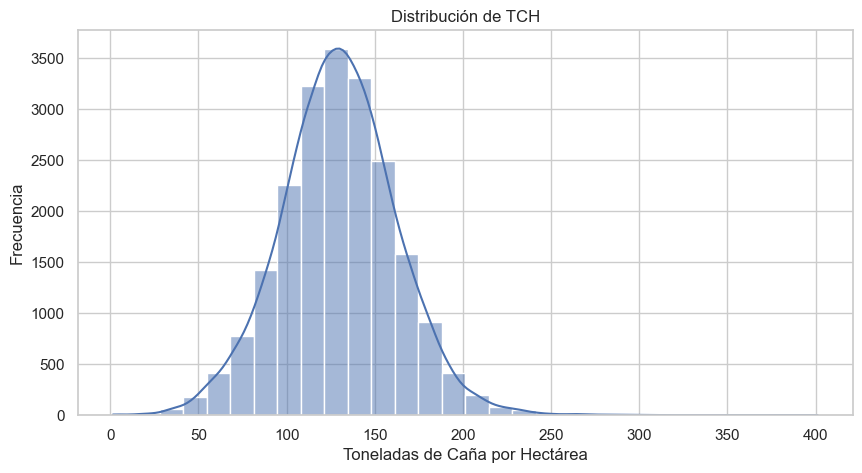

In [40]:
plt.figure(figsize=(10,5))
sns.histplot(df['TCH'].dropna(), bins=30, kde=True)
plt.title('Distribución de TCH')
plt.xlabel('Toneladas de Caña por Hectárea')
plt.ylabel('Frecuencia')
plt.show()

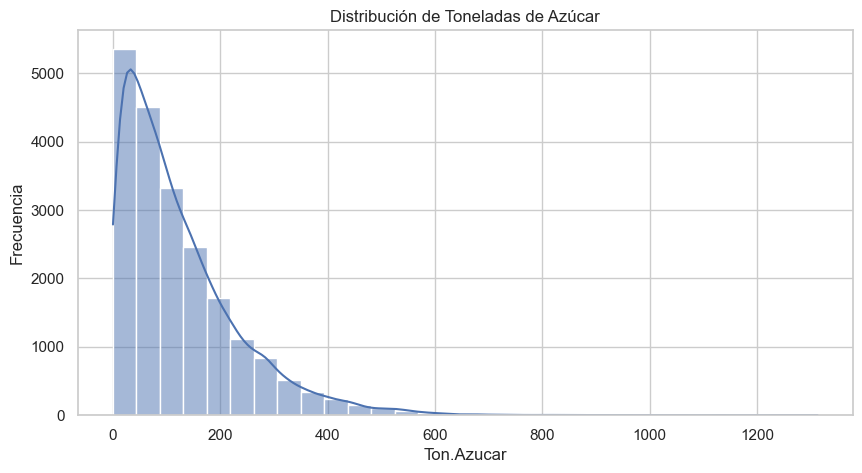

In [22]:
# Histograma de Ton.Azucar
plt.figure(figsize=(10,5))
sns.histplot(df['Ton.Azucar'].dropna(), bins=30, kde=True)
plt.title('Distribución de Toneladas de Azúcar')
plt.xlabel('Ton.Azucar')
plt.ylabel('Frecuencia')
plt.show()

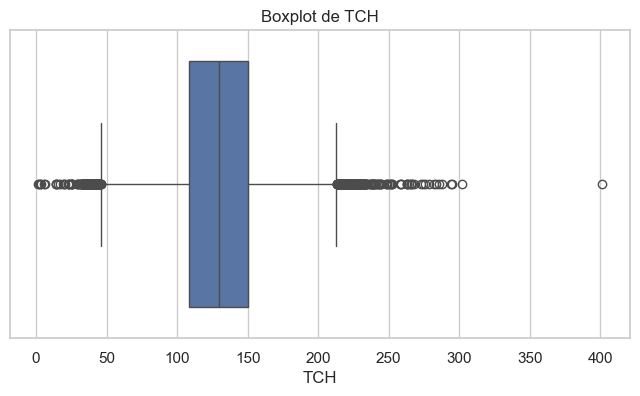

In [42]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['TCH'])
plt.title('Boxplot de TCH')
plt.show()

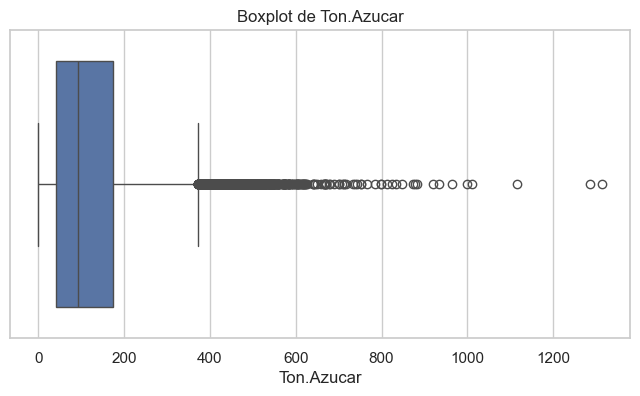

In [44]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Ton.Azucar'])
plt.title('Boxplot de Ton.Azucar')
plt.show()

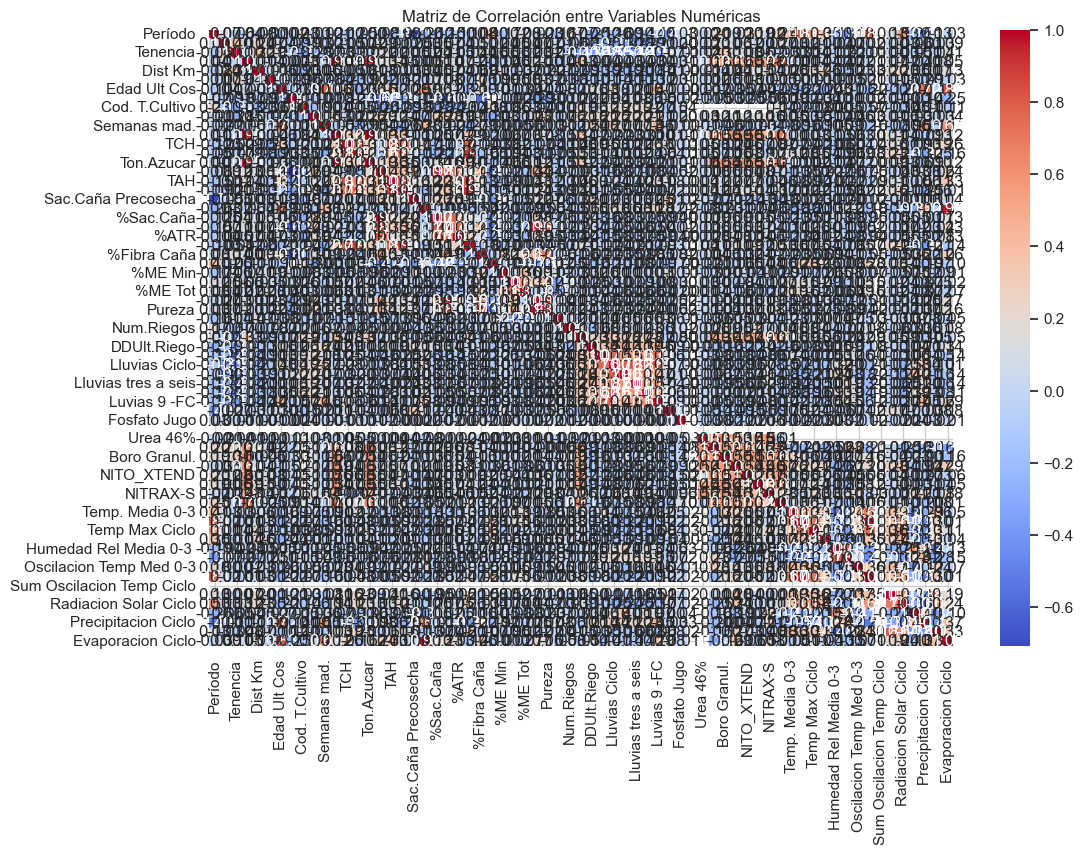

In [46]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

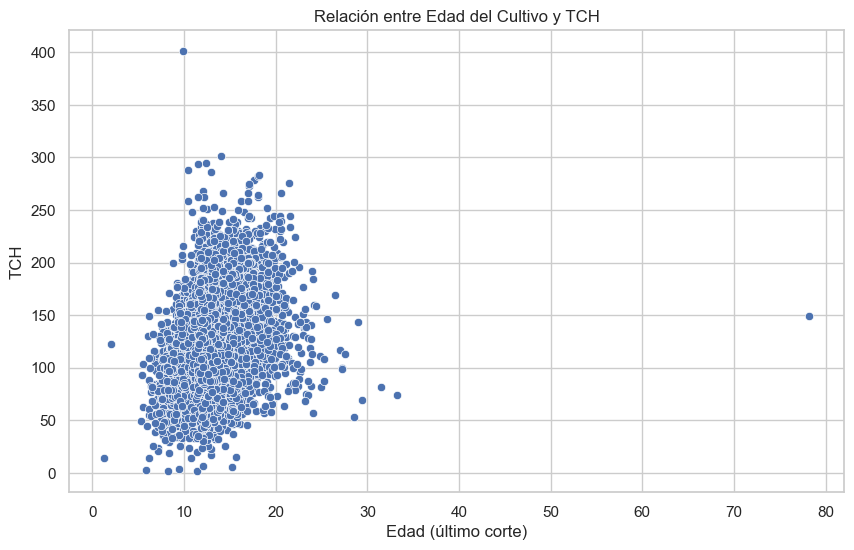

In [48]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Edad Ult Cos', y='TCH', data=df)
plt.title('Relación entre Edad del Cultivo y TCH')
plt.xlabel('Edad (último corte)')
plt.ylabel('TCH')
plt.show()

In [50]:
porcentaje_nulos = df.isnull().mean()
columnas_a_eliminar = porcentaje_nulos[porcentaje_nulos > 0.4].index

df_limpio = df.drop(columnas_a_eliminar, axis=1)

df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Período                 21027 non-null  int64         
 1   Hacienda                21027 non-null  int64         
 2   Nombre                  21027 non-null  object        
 3   Zona                    21027 non-null  object        
 4   Tenencia                21026 non-null  float64       
 5   Suerte                  21027 non-null  object        
 6   Suelo                   17269 non-null  object        
 7   Area Neta               21027 non-null  float64       
 8   Dist Km                 21022 non-null  float64       
 9   Variedad                21027 non-null  object        
 10  Cod.Estado #            21027 non-null  int64         
 11  Cod.Estado              21027 non-null  object        
 12  F.Siembra               21027 non-null  dateti

In [54]:
df_limpio = df_limpio.dropna()

df_limpio.isnull().sum().sum()

0

In [56]:
df_limpio.to_excel('Datos/HISTORICO_SUERTES_LIMPIO.xlsx', index=False)